<a href="https://colab.research.google.com/github/MaCuur/AI_EGs/blob/test/arboles_de_decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TITANIC kAGGLE

```
EJERCICIO ARBOLES DE DECISION
```



In [ ]:
import pandas as pd

datos = pd.read_csv('train.csv')
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

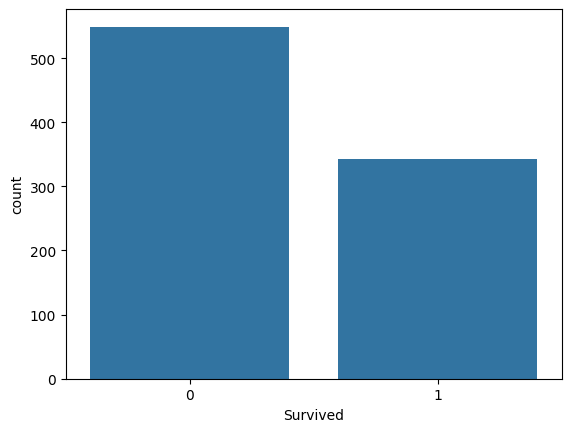

In [ ]:
import seaborn as sb
sb.countplot(x='Survived', data=datos)

<Axes: xlabel='Survived', ylabel='count'>

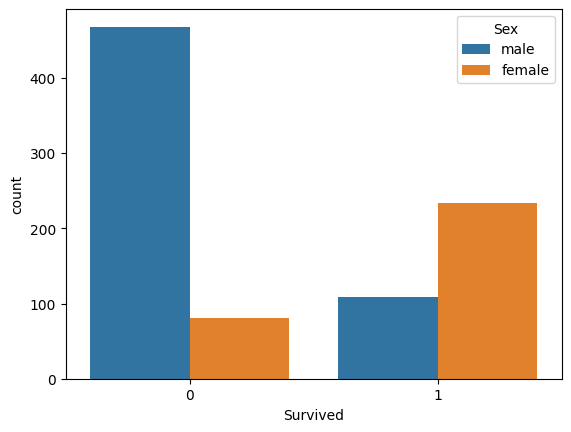

In [ ]:
sb.countplot(x='Survived', data=datos, hue='Sex')

In [ ]:
# datos vacíos
datos.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


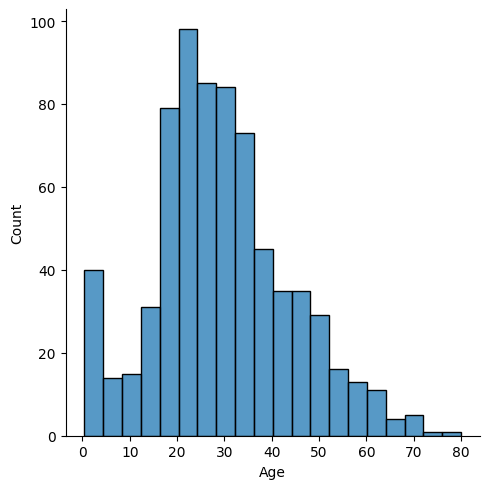

In [ ]:
# sb.displot(datos['Age'])
sb.displot(x="Age", data=datos)

In [ ]:
# llenando los datps vacios de las edades con promedios
datos['Age'] #= datos['Age'].fillna(datos['Age'].mean())

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [ ]:
datos['Age'].mean()

np.float64(29.69911764705882)

In [ ]:
datos['Age'].fillna(datos['Age'].mean()) #, inplace=True)

,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


In [ ]:
datos["Age"] = datos["Age"].fillna(datos["Age"].mean())

In [ ]:
datos["Age"]
datos.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# removiendo los datos de Cabin ya que no son datos numéricos
datos = datos.drop(["Cabin"], axis=1)

In [ ]:
# revisando los datos de embarked
datos['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [ ]:
datos = datos.dropna()

In [ ]:
datos.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
# quitando: Id, Nombre, Ticket
datos = datos.drop(["PassengerId", "Name", "Ticket"], axis=1)

In [ ]:
datos.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
# convirtiendo el parámetro Sex en una columna numérica
pd.get_dummies(datos['Sex'], drop_first=True, dtype=int)

# drop_first=True sirve para evitar eñ efecto de multiolinealidad
# (multicollinearity)

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [ ]:
dummies_sex = pd.get_dummies(datos['Sex'], drop_first=True, dtype=int)
datos = datos.join(dummies_sex)
datos = datos.drop(['Sex'], axis=1)
#datos = pd.concat([datos, dummies_sex], axis=1)

<Axes: xlabel='Survived', ylabel='count'>

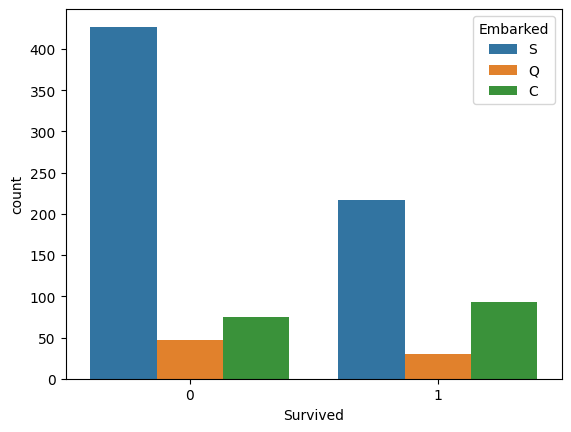

In [ ]:
# realizando una gráfica para revisar el resto de los datos
sb.countplot(x='Survived', data=datos, hue='Embarked')

In [ ]:
# obteniendo dummies de Embarked
dummies_embarked = pd.get_dummies(datos["Embarked"], drop_first=True, dtype=int)

In [ ]:
datos = datos.join(dummies_embarked)
datos = datos.drop(["Embarked"], axis=1)

<Axes: >

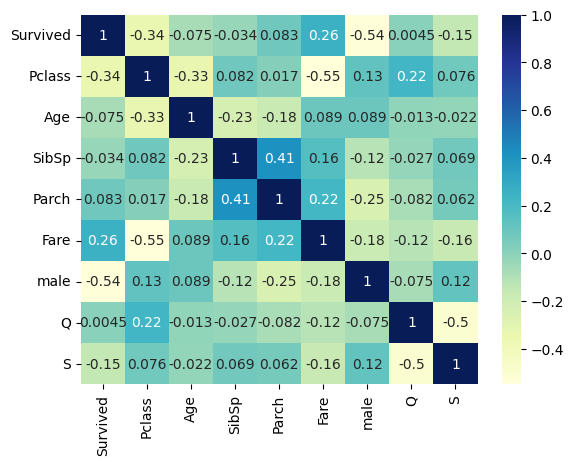

In [ ]:
sb.heatmap(datos.corr(), annot=True, cmap='YlGnBu')

<Axes: xlabel='Survived', ylabel='count'>

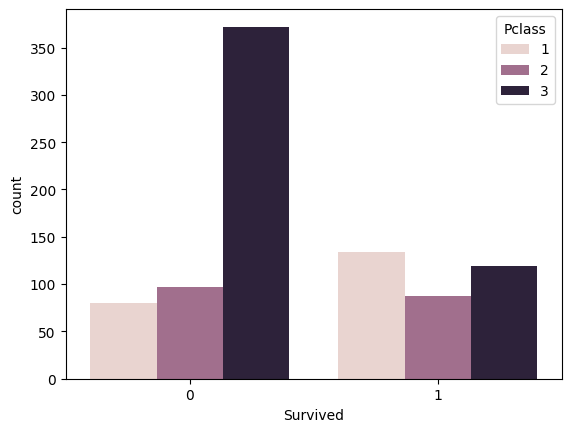

In [ ]:
sb.countplot(x='Survived', data=datos, hue='Pclass')

Una ves terminado el análisis, se comienzan a separar los datos y se realiza el entrenamiento

In [ ]:
x = datos.drop(['Survived'], axis=1)
y =  datos['Survived']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)#, random_state=42)

A PARTIR DE AQUÍ SE IMPLEMENTAN LOS ARBOLES DE DECISION

In [ ]:
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier(max_depth=50)
modelo.fit(x_train, y_train)
predicciones = modelo.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predicciones)

0.7865168539325843

In [ ]:
# realizamos una iteración para comparar varios resultados del modelo a la vez

from sklearn.tree import DecisionTreeClassifier

#para cuardar todos los resultados:
resultados = []

for i in range(1, 15):
  modelo = DecisionTreeClassifier(max_depth=i)
  modelo.fit(x_train, y_train)
  predicciones = modelo.predict(x_test)
  exactitud = accuracy_score(y_test, predicciones)
  print(f"Exactitud para max_depth={i}: {exactitud}")
  resultados.append(exactitud)

Exactitud para max_depth=1: 0.7696629213483146
Exactitud para max_depth=2: 0.7808988764044944
Exactitud para max_depth=3: 0.7808988764044944
Exactitud para max_depth=4: 0.7865168539325843
Exactitud para max_depth=5: 0.7921348314606742
Exactitud para max_depth=6: 0.8033707865168539
Exactitud para max_depth=7: 0.7921348314606742
Exactitud para max_depth=8: 0.7865168539325843
Exactitud para max_depth=9: 0.7921348314606742
Exactitud para max_depth=10: 0.7865168539325843
Exactitud para max_depth=11: 0.7921348314606742
Exactitud para max_depth=12: 0.7865168539325843
Exactitud para max_depth=13: 0.797752808988764
Exactitud para max_depth=14: 0.7808988764044944


<Axes: >

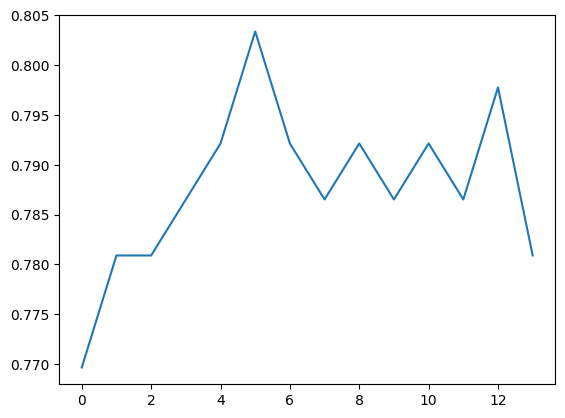

In [ ]:
sb.lineplot(data=resultados)

In [ ]:
modelo = DecisionTreeClassifier(max_depth=6)
modelo.fit(x_train, y_train)
predicciones = modelo.predict(x_test)
exactitud = accuracy_score(y_test, predicciones)


In [ ]:
exactitud

0.8033707865168539

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86       113
           1       0.86      0.55      0.67        65

    accuracy                           0.80       178
   macro avg       0.82      0.75      0.77       178
weighted avg       0.81      0.80      0.79       178



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicciones)

array([[107,   6],
       [ 29,  36]])

In [ ]:
pd.DataFrame(confusion_matrix(y_test, predicciones), columns=['Pred: No', 'Pred: Si'], index=['Real: No', 'Real: Si'])

,Pred: No,Pred: Si
Real: No,107,6
Real: Si,29,36


[Text(0.4875, 0.9285714285714286, 'male <= 0.5\n0.474\n711\n[436, 275]\nmurió'),
 Text(0.2777777777777778, 0.7857142857142857, 'Pclass <= 2.5\n0.381\n258\n[66, 192]\nvivió'),
 Text(0.38263888888888886, 0.8571428571428572, 'True  '),
 Text(0.10555555555555556, 0.6428571428571429, 'Age <= 2.5\n0.083\n138\n[6, 132]\nvivió'),
 Text(0.044444444444444446, 0.5, 'Pclass <= 1.5\n0.5\n2\n[1, 1]\nmurió'),
 Text(0.022222222222222223, 0.35714285714285715, '0.0\n1\n[1, 0]\nmurió'),
 Text(0.06666666666666667, 0.35714285714285715, '0.0\n1\n[0, 1]\nvivió'),
 Text(0.16666666666666666, 0.5, 'Age <= 27.5\n0.071\n136\n[5, 131]\nvivió'),
 Text(0.1111111111111111, 0.35714285714285715, 'Age <= 24.5\n0.153\n48\n[4, 44]\nvivió'),
 Text(0.06666666666666667, 0.21428571428571427, 'Fare <= 13.396\n0.049\n40\n[1, 39]\nvivió'),
 Text(0.044444444444444446, 0.07142857142857142, '0.278\n6\n[1, 5]\nvivió'),
 Text(0.08888888888888889, 0.07142857142857142, '0.0\n34\n[0, 34]\nvivió'),
 Text(0.15555555555555556, 0.2142857142

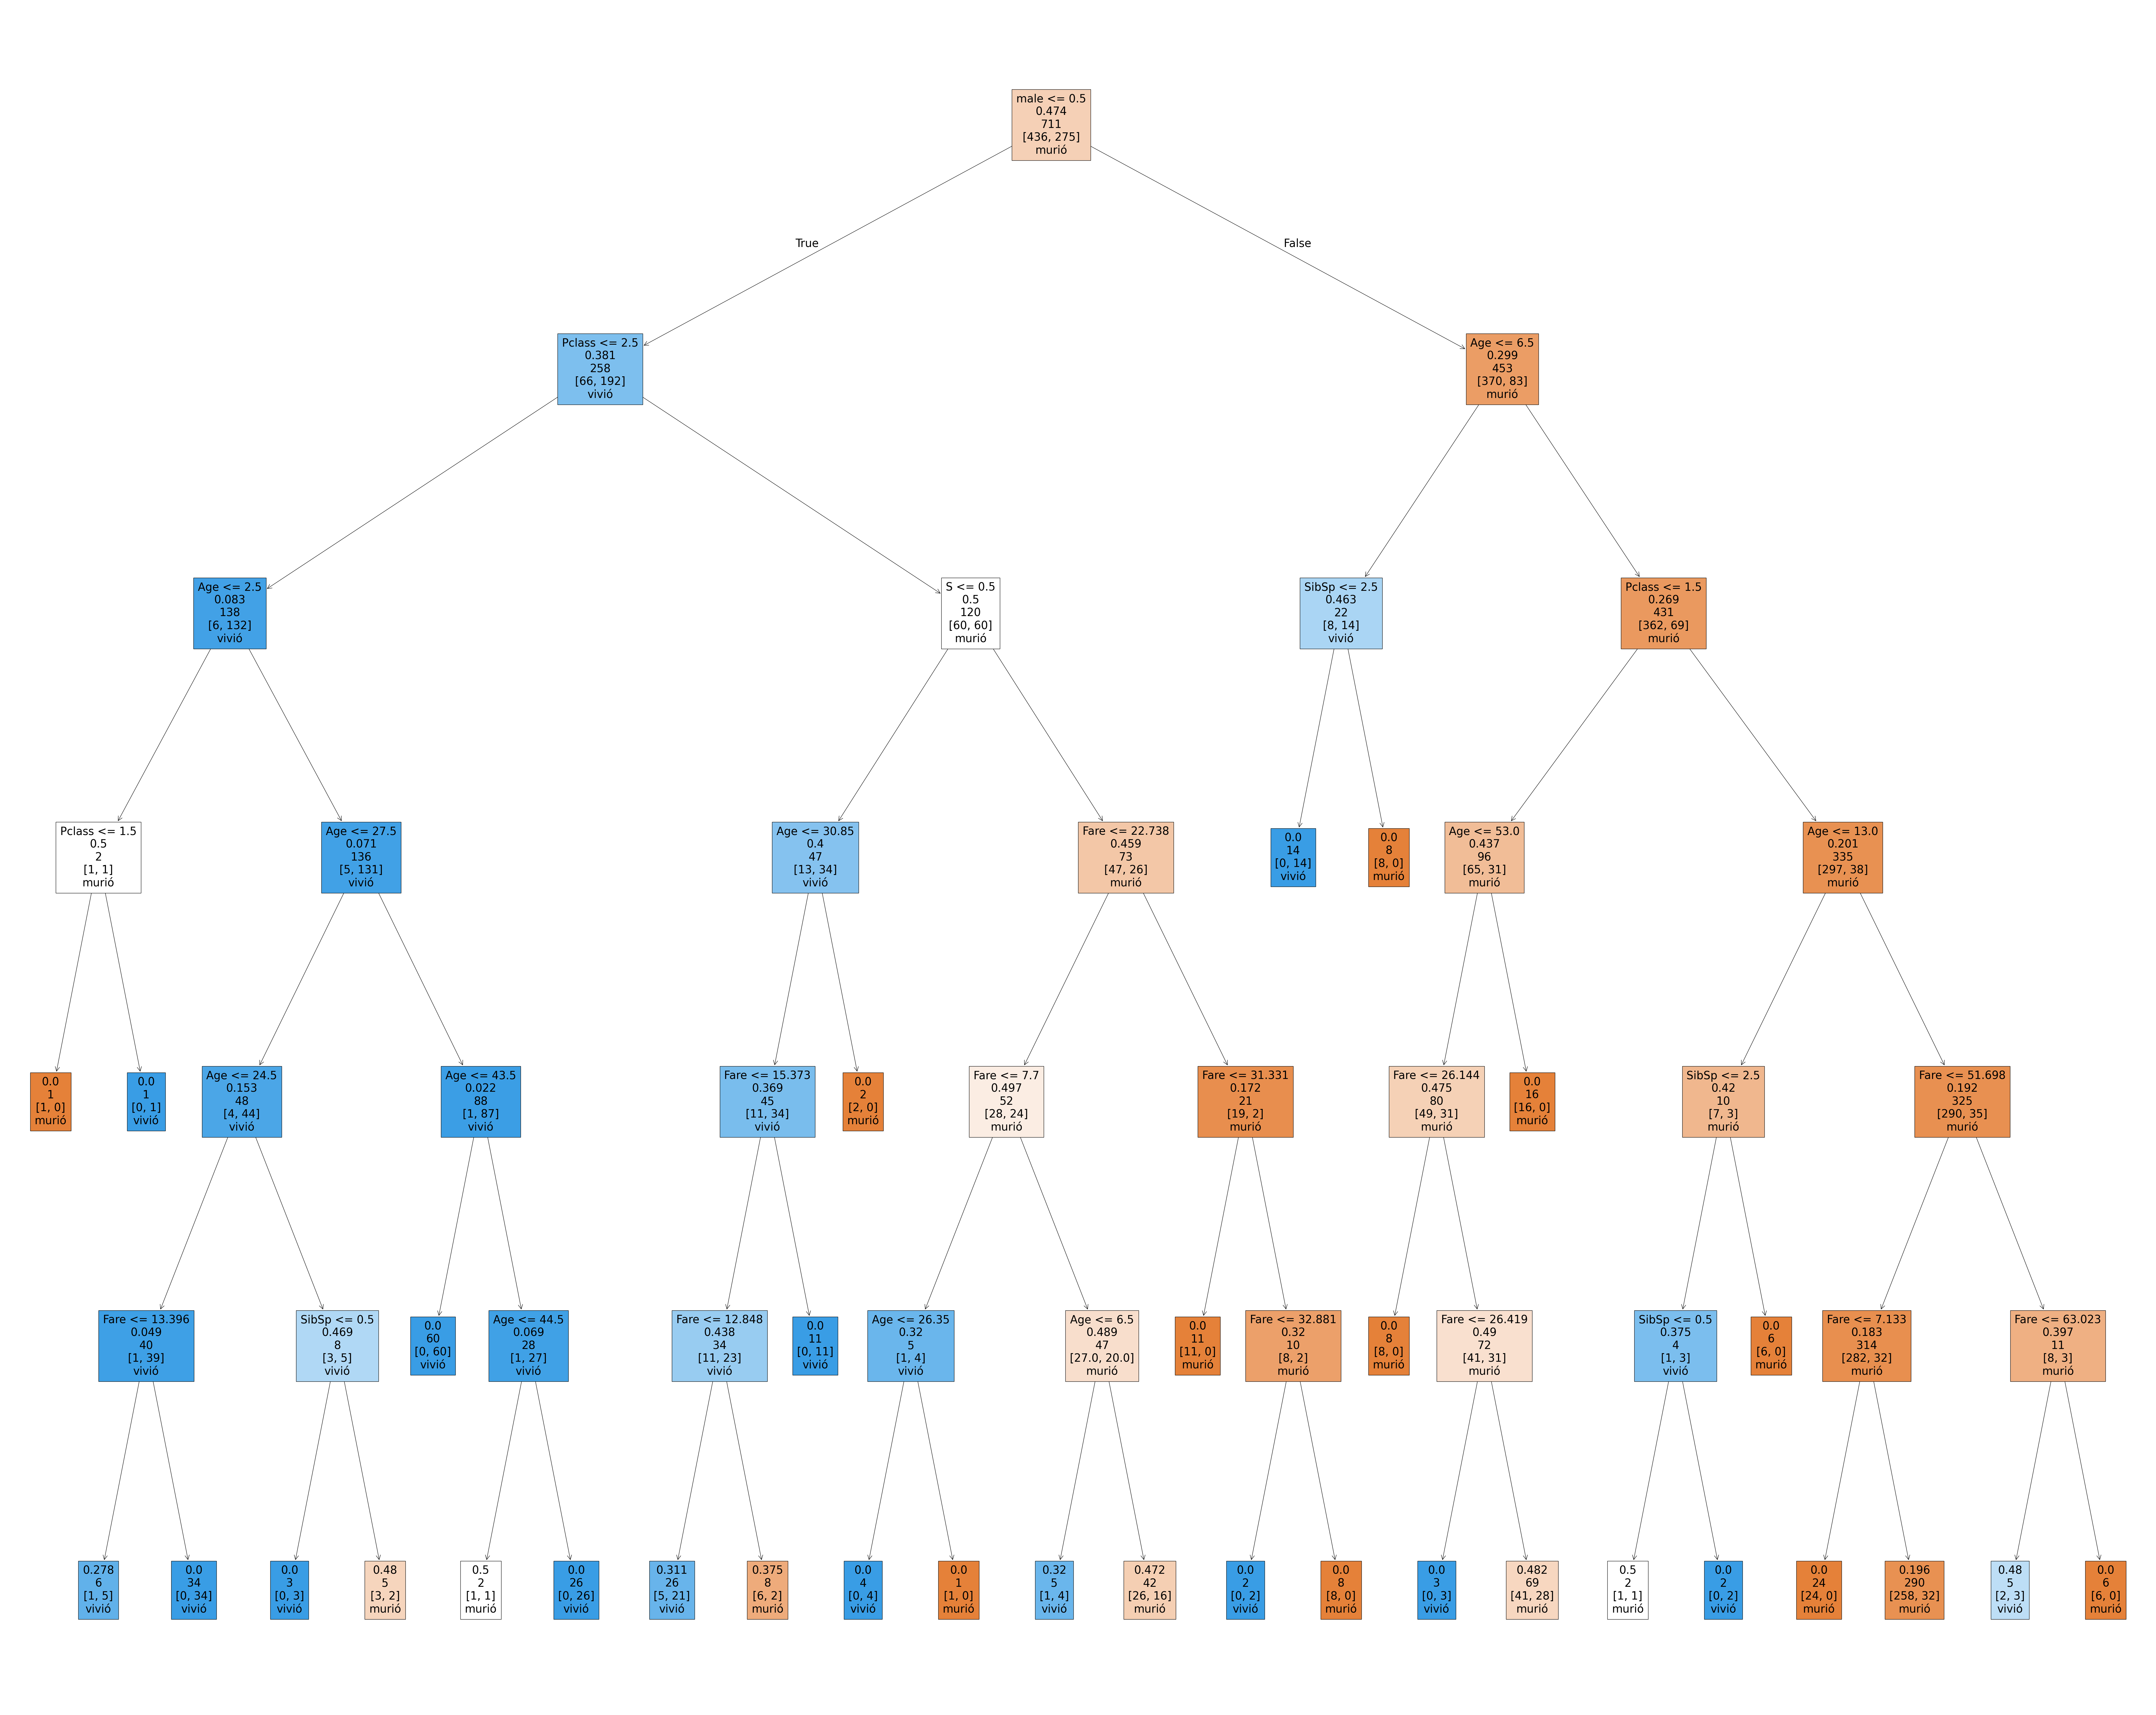

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(100,80))
plot_tree(modelo, feature_names=x_train.columns, class_names=["murió","vivió"], filled=True, label="none")
#plt.show()